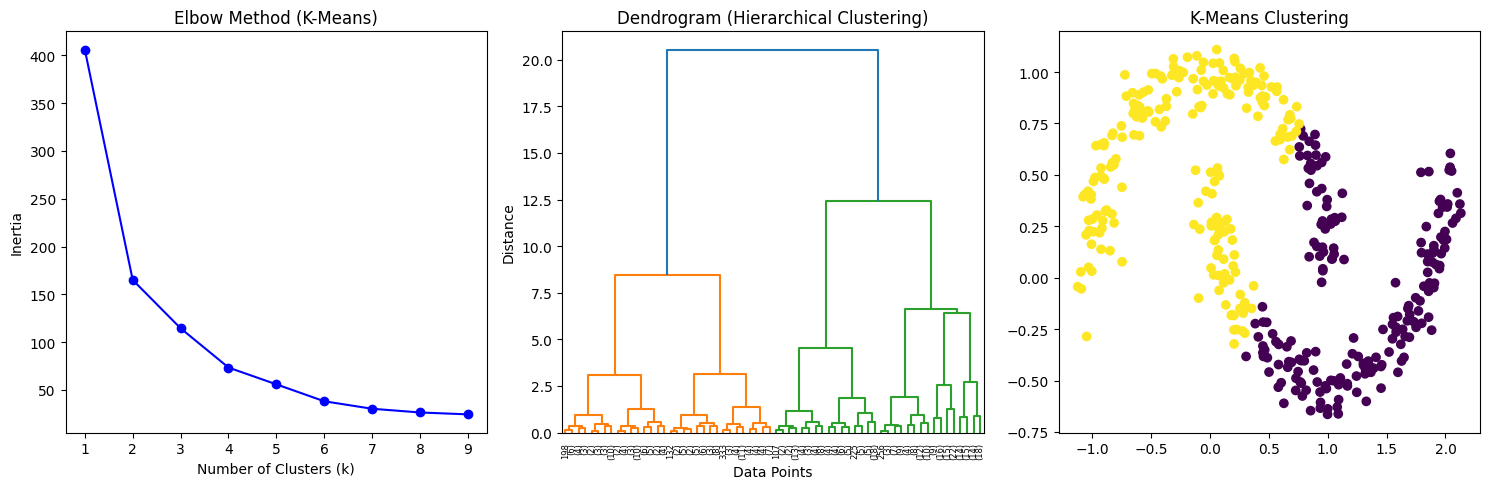

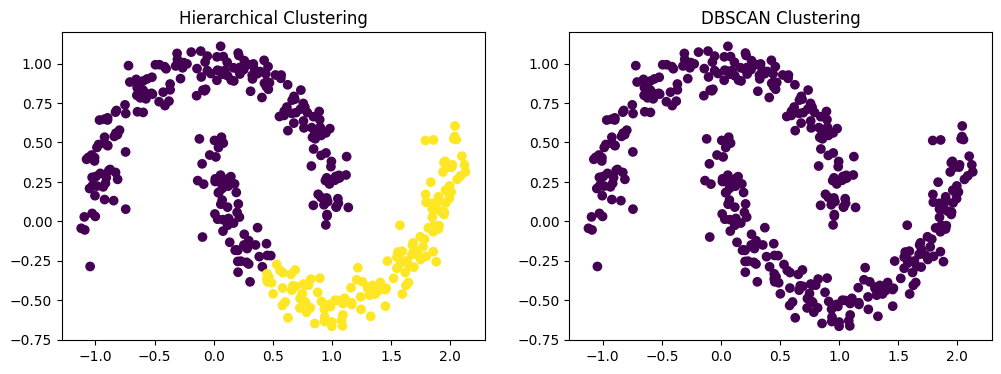

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# ----- Dataset -----
X, _ = make_moons(n_samples=400, noise=0.08, random_state=42)

# ----- Elbow Method for K-Means -----
inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method (K-Means)')

# ----- Dendrogram for Hierarchical Clustering -----
linked = linkage(X, method='ward')

plt.subplot(1,3,2)
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Data Points')
plt.ylabel('Distance')

# ----- Clustering Results -----
kmeans = KMeans(n_clusters=2, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='ward')
dbscan = DBSCAN(eps=0.3, min_samples=5)

y_kmeans = kmeans.fit_predict(X)
y_hier = hierarchical.fit_predict(X)
y_dbscan = dbscan.fit_predict(X)

plt.subplot(1,3,3)
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y_hier, cmap='viridis')
plt.title('Hierarchical Clustering')

plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=y_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.show()
